# Exercise 2

In [1]:
from bandit import Bandit
from algorithms import *
from simulation import simulate
from tqdm import tqdm 
import time 
import numpy as np
import matplotlib.pyplot as plt

# fix seed for reproducibility
np.random.seed(42)

K = 10
horizon = 10_000
num_simulations = 100



## Algorithms, algorithms, algorithms

The aim of this task is to implement the remaining bandit algorithms from the lecture. To this
end, implement the following algorithms and versions of the algorithms:


### 1. Greedy: 
Implement the purely greedy algorithm, the ϵ-greedy algorithm with fixed ϵ, and the ϵ-greedy algorithm with rates ϵt decreasing in time.

We start with purely greedy algo as it is the simplest one

In [2]:
from algorithms import GreedyAgent
from simulation import simulate
from bandit import Bandit


print(f"Running simulations for Greedy agent")
bandit = Bandit(K=K, dist_type='gaussian')
actual_means = bandit.means
greedy_results = {'regret': [], 'optimal': []}
estimates_over_time = []


for _ in tqdm(range(num_simulations)):
    agent = GreedyAgent(K=10)
    _, regret, optimal_choices, estimates = simulate(bandit, agent, horizon)
    greedy_results['regret'].append(regret)
    greedy_results['optimal'].append(optimal_choices)
    estimates_over_time.append(estimates)
estimates_over_time = np.array(estimates_over_time)
greedy_results['optimal'] = np.array(greedy_results['optimal'])
actual_means = np.array(actual_means)

Running simulations for Greedy agent


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:02<00:00, 46.09it/s]


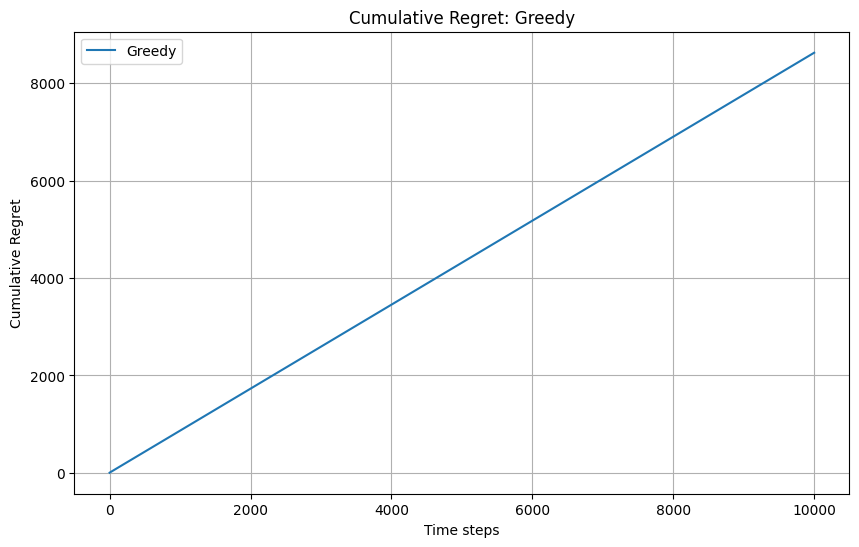

In [3]:
plt.figure(figsize=(10, 6))

# Plot ETC for different m

mean_regret = np.mean(greedy_results['regret'], axis=0)
plt.plot(mean_regret, label=f"Greedy")



plt.xlabel("Time steps")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret: Greedy")
plt.legend()
plt.grid()
plt.show()


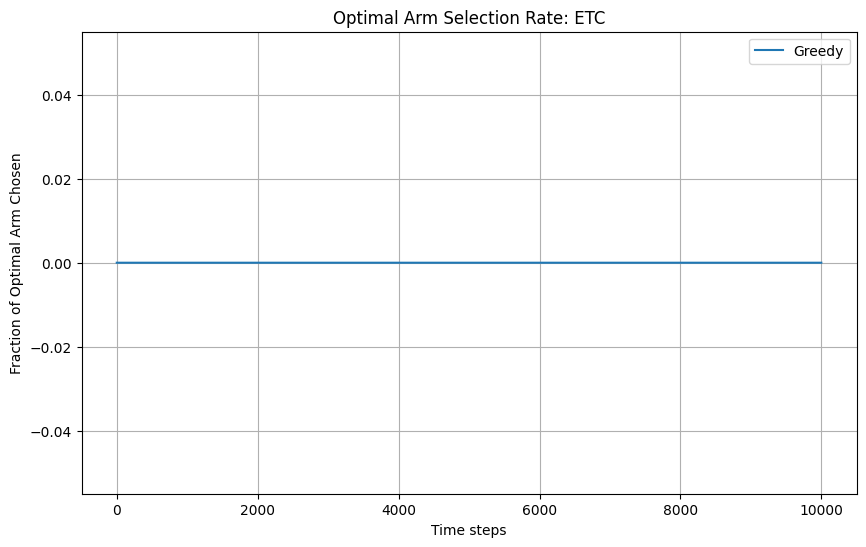

In [4]:
plt.figure(figsize=(10, 6))



mean_optimal = np.mean(greedy_results['optimal'], axis=0)
plt.plot(mean_optimal, label=f"Greedy")

plt.xlabel("Time steps")
plt.ylabel("Fraction of Optimal Arm Chosen")
plt.title("Optimal Arm Selection Rate: ETC")
plt.legend()
plt.grid()
plt.show()


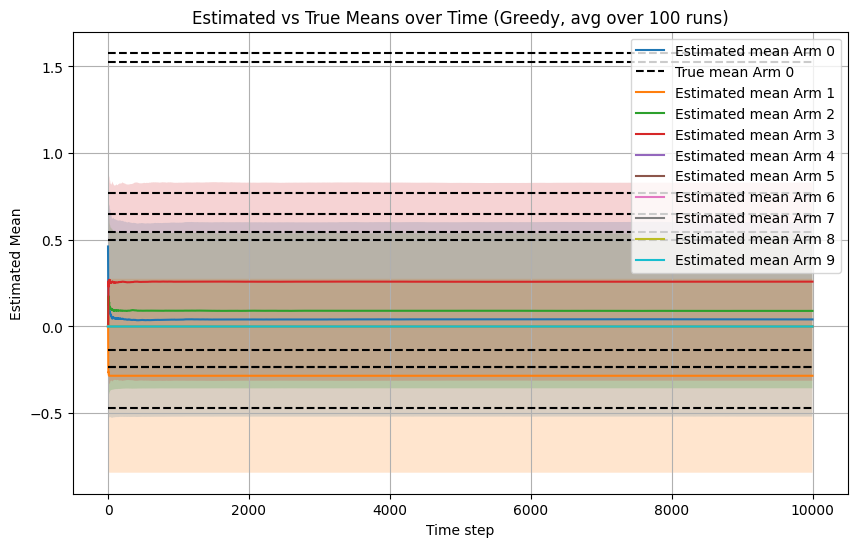

In [5]:
arms_to_plot = list(range(K))  # select arms
time_steps = np.arange(horizon)


est = estimates_over_time  # shape: [num_runs, time, K]

plt.figure(figsize=(10, 6))
for arm in arms_to_plot:
    mean_est = est[:, :, arm].mean(axis=0)  # [time]
    std_est = est[:, :, arm].std(axis=0)    # [time]
    
    # Plot mean with confidence band
    plt.plot(time_steps, mean_est, label=f"Estimated mean Arm {arm}")
    plt.fill_between(time_steps, mean_est - std_est, mean_est + std_est, alpha=0.2)

    # Plot true mean
    plt.hlines(actual_means[arm], 0, horizon, colors='k', linestyles='--',
                label=f"True mean Arm {arm}" if arm == 0 else None)

plt.title(f"Estimated vs True Means over Time (Greedy, avg over {num_simulations} runs)")
plt.xlabel("Time step")
plt.ylabel("Estimated Mean")
plt.legend()
plt.grid(True)
plt.show()


Let's do EpsilonGreedy now

In [6]:
epsilon_values = [0.3, 0.5, 0.7, 0.9, 0.999]

epsilon_results = {epsilon: {'regret': [], 'optimal': []} for epsilon in epsilon_values}
estimates_over_time = {epsilon: [] for epsilon in epsilon_values}
actual_means = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    print(f"Running simulations for Epsilon (epsilon = {epsilon})")
    bandit = Bandit(K=K, dist_type='gaussian')
    actual_means[epsilon].append(bandit.means)
    for _ in tqdm(range(num_simulations)):
        agent = EpsilonGreedyAgent(K=K, epsilon=epsilon)
        _, regret, optimal_choices, estimates = simulate(bandit, agent, horizon)
        epsilon_results[epsilon]['regret'].append(regret)
        epsilon_results[epsilon]['optimal'].append(optimal_choices)
        estimates_over_time[epsilon].append(estimates)
    estimates_over_time[epsilon] = np.array(estimates_over_time[epsilon])
    epsilon_results[epsilon]['optimal'] = np.array(epsilon_results[epsilon]['optimal'])
    actual_means[epsilon] = np.array(actual_means[epsilon][0])


Running simulations for Epsilon (epsilon = 0.3)


100%|██████████| 100/100 [00:02<00:00, 37.17it/s]


Running simulations for Epsilon (epsilon = 0.5)


100%|██████████| 100/100 [00:02<00:00, 36.25it/s]


Running simulations for Epsilon (epsilon = 0.7)


100%|██████████| 100/100 [00:02<00:00, 33.82it/s]


Running simulations for Epsilon (epsilon = 0.9)


100%|██████████| 100/100 [00:03<00:00, 31.82it/s]


Running simulations for Epsilon (epsilon = 0.999)


100%|██████████| 100/100 [00:02<00:00, 37.67it/s]


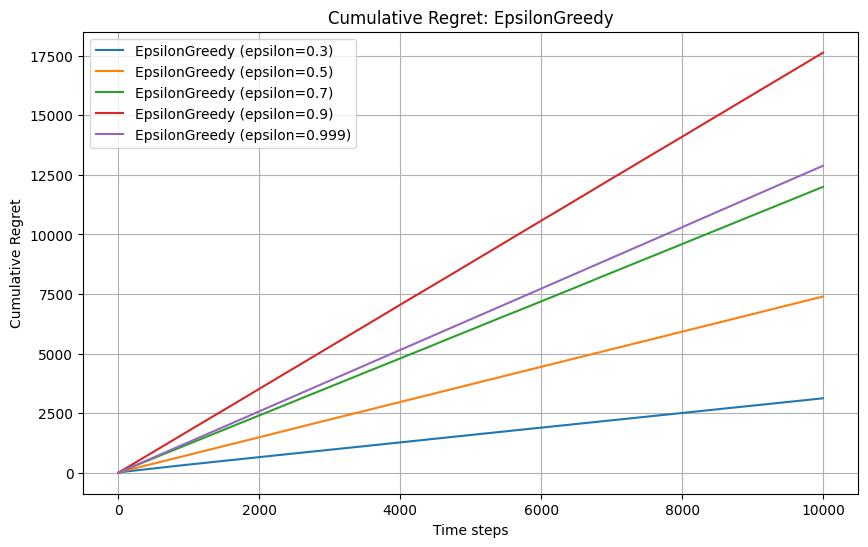

In [7]:
plt.figure(figsize=(10, 6))

# Plot EpsilonGreedy for different epsilon
for epsilon in epsilon_values:
    mean_regret = np.mean(epsilon_results[epsilon]['regret'], axis=0)
    plt.plot(mean_regret, label=f"EpsilonGreedy (epsilon={epsilon})")



plt.xlabel("Time steps")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret: EpsilonGreedy")
plt.legend()
plt.grid()
plt.show()



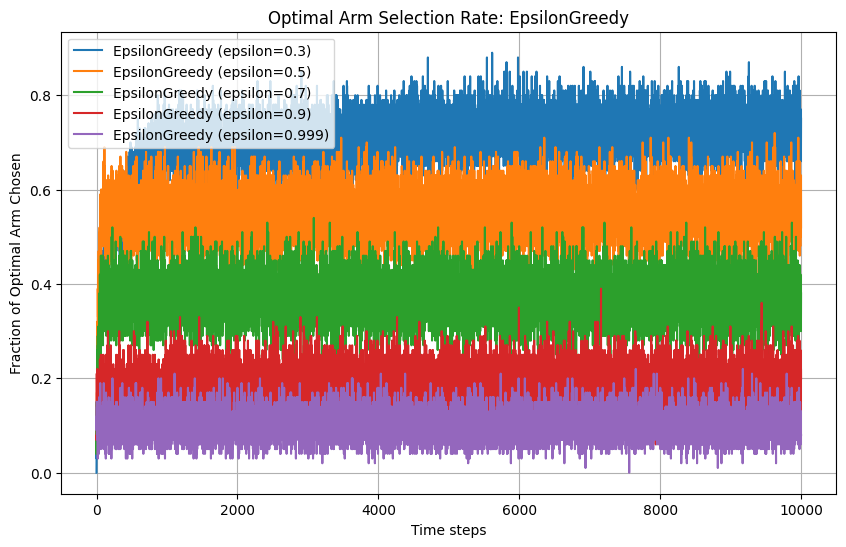

In [8]:
plt.figure(figsize=(10, 6))

# Plot EpsilonGreedy
for epsilon in epsilon_values:
    mean_optimal = np.mean(epsilon_results[epsilon]['optimal'], axis=0)
    plt.plot(mean_optimal, label=f"EpsilonGreedy (epsilon={epsilon})")

plt.xlabel("Time steps")
plt.ylabel("Fraction of Optimal Arm Chosen")
plt.title("Optimal Arm Selection Rate: EpsilonGreedy")
plt.legend()
plt.grid()
plt.show()


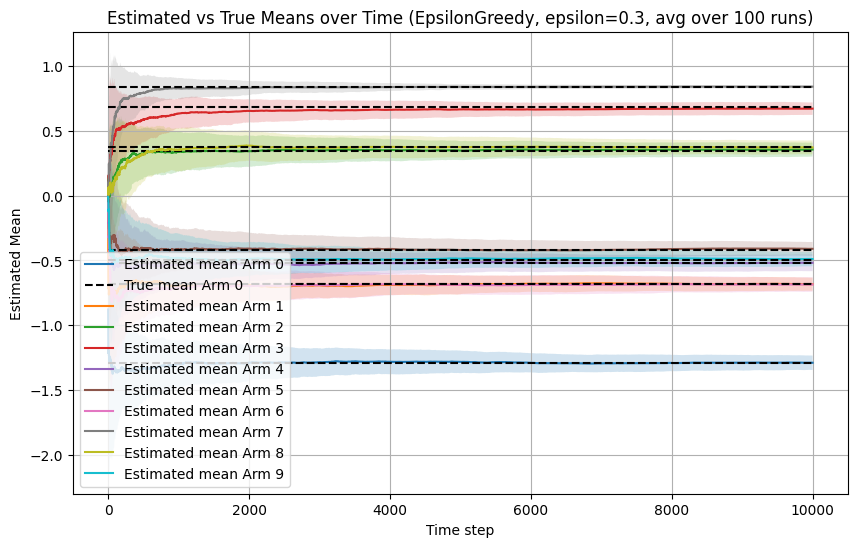

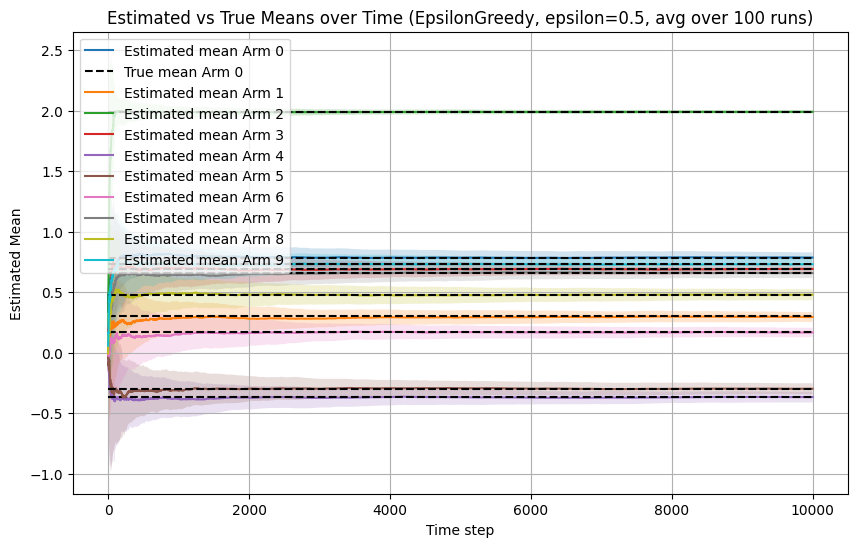

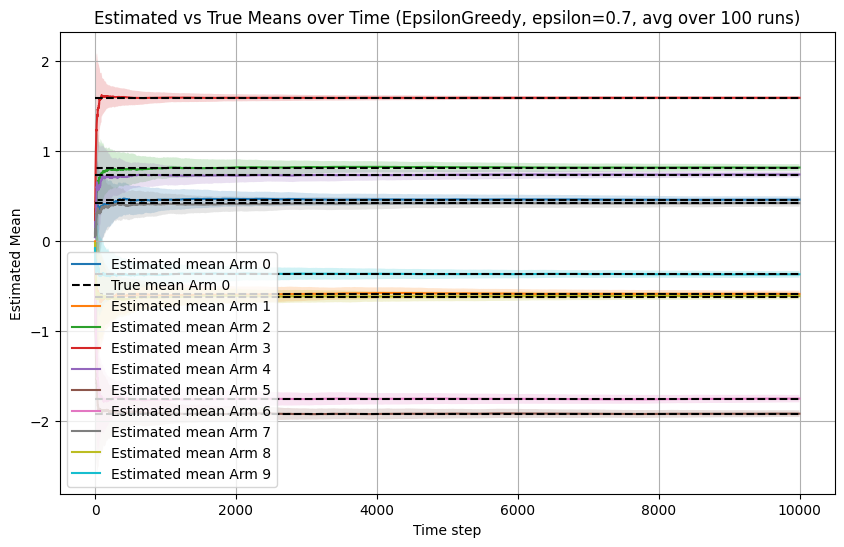

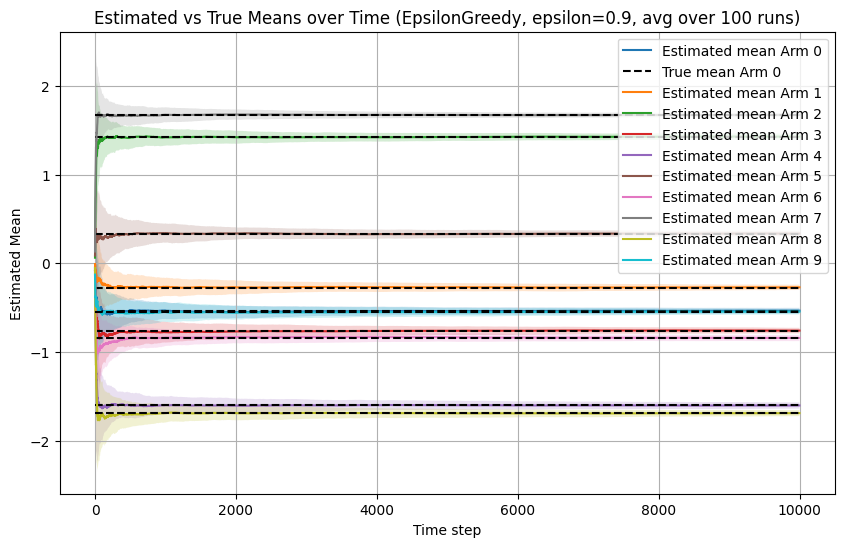

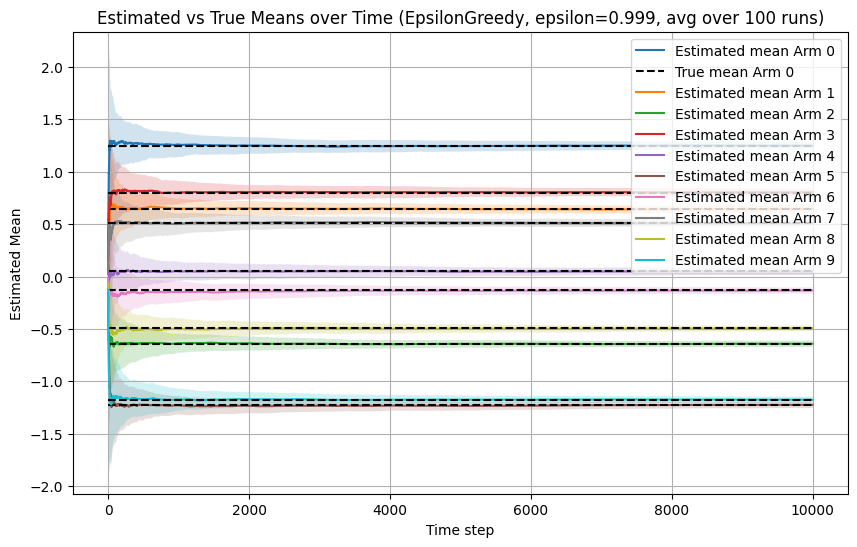

In [9]:
arms_to_plot = list(range(K))  # select arms
time_steps = np.arange(horizon)

for epsilon in epsilon_values:
    est = estimates_over_time[epsilon]  # shape: [num_runs, time, K]

    plt.figure(figsize=(10, 6))
    for arm in arms_to_plot:
        mean_est = est[:, :, arm].mean(axis=0)  # [time]
        std_est = est[:, :, arm].std(axis=0)    # [time]
        
        # Plot mean with confidence band
        plt.plot(time_steps, mean_est, label=f"Estimated mean Arm {arm}")
        plt.fill_between(time_steps, mean_est - std_est, mean_est + std_est, alpha=0.2)

        # Plot true mean
        plt.hlines(actual_means[epsilon][arm], 0, horizon, colors='k', linestyles='--',
                   label=f"True mean Arm {arm}" if arm == 0 else None)

    plt.title(f"Estimated vs True Means over Time (EpsilonGreedy, epsilon={epsilon}, avg over {num_simulations} runs)")
    plt.xlabel("Time step")
    plt.ylabel("Estimated Mean")
    plt.legend()
    plt.grid(True)
    plt.show()


now let's try Explore then EpsilonGreedy with decreasing epsilon

In [10]:
from algorithms import ExploreThenEpsilonGreedyAgent
from simulation import simulate
from bandit import Bandit
from tqdm import tqdm
import numpy as np

d_values = [0.1, 0.05, 0.01]
c_values = [5, 5, 10]

eteg_results = {}
eteg_estimates = {}
eteg_actual_means = {}

for d, C in zip(d_values, c_values):
    label = f'd={d}_C={C}'
    print(f"Running simulations for {label}")
    
    eteg_results[label] = {'regret': [], 'optimal': []}
    eteg_estimates[label] = []
    eteg_actual_means[label] = []

    bandit = Bandit(K=K, dist_type='gaussian')
    eteg_actual_means[label].append(bandit.means)

    for _ in tqdm(range(num_simulations)):
        agent = ExploreThenEpsilonGreedyAgent(K=K, d=d, C=C)
        _, regret, optimal_choices, estimates = simulate(bandit, agent, horizon)
        eteg_results[label]['regret'].append(regret)
        eteg_results[label]['optimal'].append(optimal_choices)
        eteg_estimates[label].append(estimates)

    eteg_estimates[label] = np.array(eteg_estimates[label])
    eteg_results[label]['optimal'] = np.array(eteg_results[label]['optimal'])
    eteg_actual_means[label] = np.array(eteg_actual_means[label][0])


Running simulations for d=0.1_C=5


100%|██████████| 100/100 [00:03<00:00, 32.98it/s]


Running simulations for d=0.05_C=5


100%|██████████| 100/100 [00:02<00:00, 33.66it/s]


Running simulations for d=0.01_C=10


100%|██████████| 100/100 [00:02<00:00, 34.05it/s]


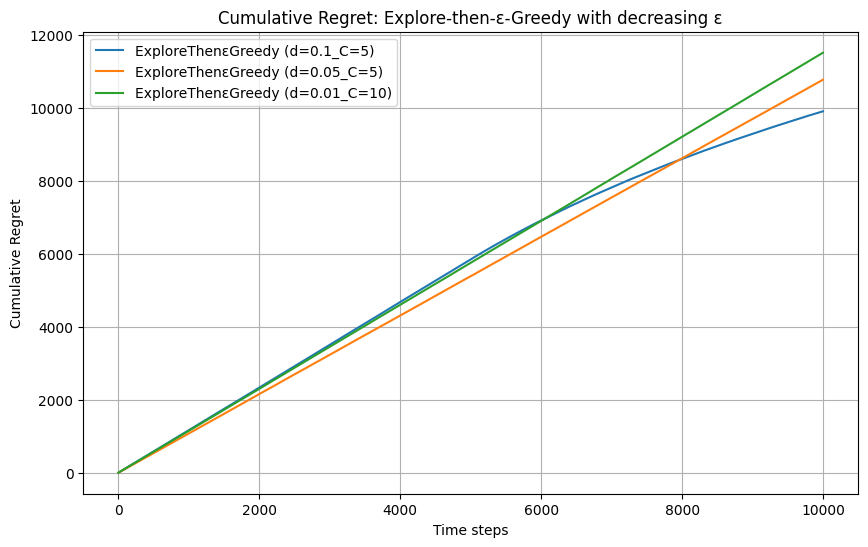

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot ExploreThenEpsilonGreedy for each (d, C) setting
for label in eteg_results:
    mean_regret = np.mean(eteg_results[label]['regret'], axis=0)
    plt.plot(mean_regret, label=f"ExploreThenεGreedy ({label})")

plt.xlabel("Time steps")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret: Explore-then-ε-Greedy with decreasing ε")
plt.legend()
plt.grid(True)
plt.show()


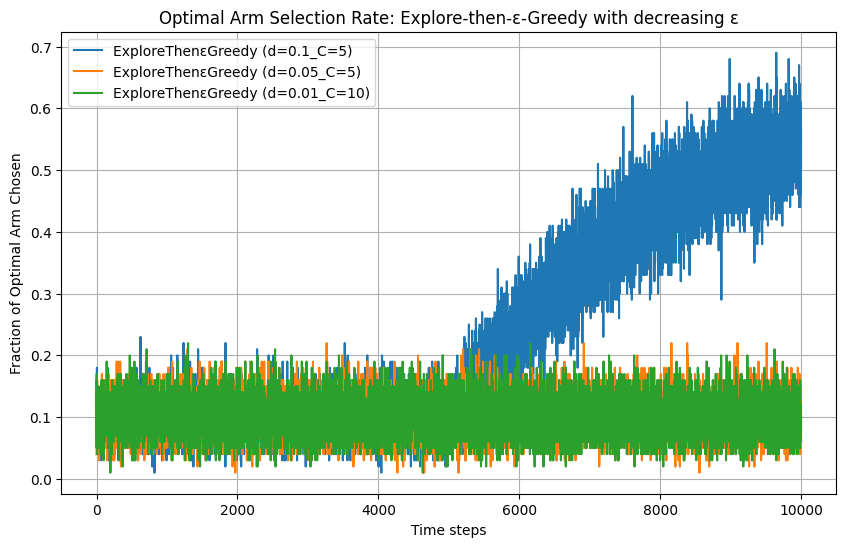

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot ExploreThenEpsilonGreedy optimal arm selection rate
for label in eteg_results:
    mean_optimal = np.mean(eteg_results[label]['optimal'], axis=0)
    plt.plot(mean_optimal, label=f"ExploreThenεGreedy ({label})")

plt.xlabel("Time steps")
plt.ylabel("Fraction of Optimal Arm Chosen")
plt.title("Optimal Arm Selection Rate: Explore-then-ε-Greedy with decreasing ε")
plt.legend()
plt.grid(True)
plt.show()


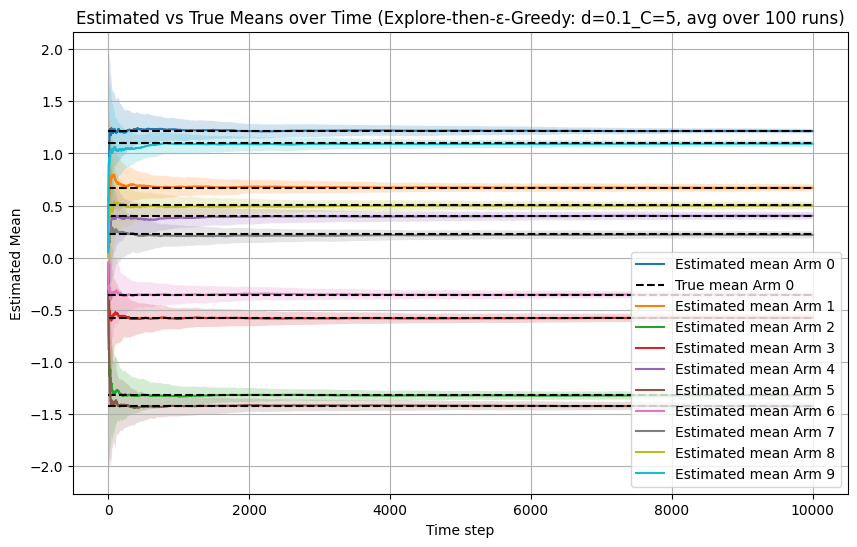

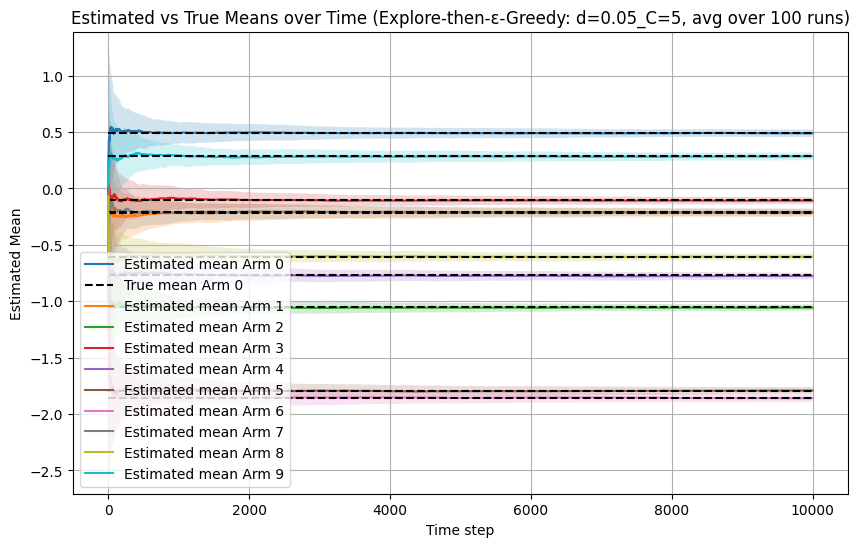

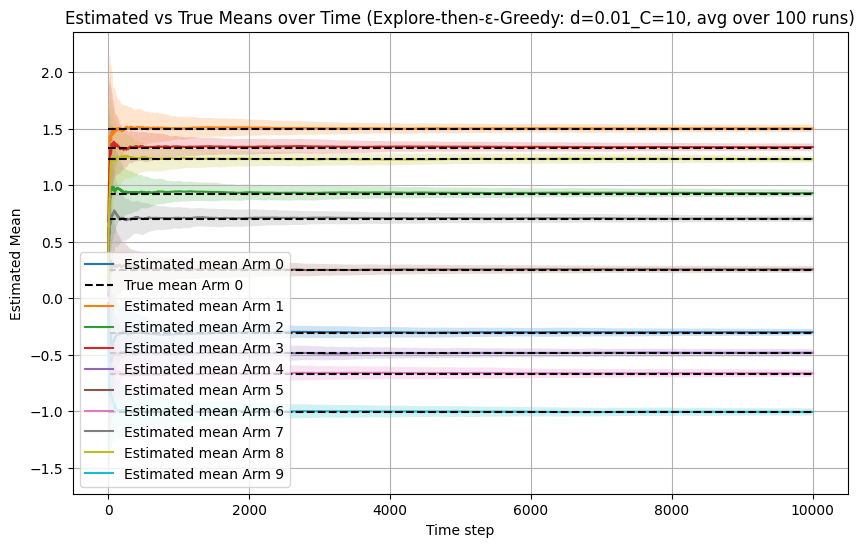

In [13]:
arms_to_plot = list(range(K))  # select arms
time_steps = np.arange(horizon)

for label in eteg_estimates:
    est = eteg_estimates[label]  # shape: [num_runs, time, K]

    plt.figure(figsize=(10, 6))
    for arm in arms_to_plot:
        mean_est = est[:, :, arm].mean(axis=0)  # [time]
        std_est = est[:, :, arm].std(axis=0)    # [time]
        
        # Plot mean estimate with confidence band
        plt.plot(time_steps, mean_est, label=f"Estimated mean Arm {arm}")
        plt.fill_between(time_steps, mean_est - std_est, mean_est + std_est, alpha=0.2)

        # Plot true mean
        true_mean = eteg_actual_means[label][arm]
        plt.hlines(true_mean, 0, horizon, colors='k', linestyles='--',
                   label=f"True mean Arm {arm}" if arm == 0 else None)

    plt.title(f"Estimated vs True Means over Time (Explore-then-ε-Greedy: {label}, avg over {num_simulations} runs)")
    plt.xlabel("Time step")
    plt.ylabel("Estimated Mean")
    plt.legend()
    plt.grid(True)
    plt.show()


## 2. UCB: 
Implement the UCB algorithm as presented in the lecture, and the version adapted
to σ-subgaussian bandits.

We start we UCB algorithm introduced in lecture

In [1]:
from bandit import Bandit
from algorithms import UCBAgent
from simulation import simulate
from tqdm import tqdm 
import time 
import numpy as np
import matplotlib.pyplot as plt

# fix seed for reproducibility
np.random.seed(42)

K = 10
horizon = 10_000
num_simulations = 100



In [2]:
delta_values = [0.01, 0.05, 0.1, 0.4, 0.9]

delta_results = {delta: {'regret': [], 'optimal': []} for delta in delta_values}
estimates_over_time = {delta: [] for delta in delta_values}
actual_means = {delta: [] for delta in delta_values}

for delta in delta_values:
    print(f"Running simulations for UCB (delta = {delta})")
    bandit = Bandit(K=K, dist_type='gaussian')
    actual_means[delta].append(bandit.means)
    
    for _ in tqdm(range(num_simulations)):
        agent = UCBAgent(K=K, delta=delta)
        _, regret, optimal_choices, estimates = simulate(bandit, agent, horizon)
        
        delta_results[delta]['regret'].append(regret)
        delta_results[delta]['optimal'].append(optimal_choices)
        estimates_over_time[delta].append(estimates)
    
    estimates_over_time[delta] = np.array(estimates_over_time[delta])
    delta_results[delta]['optimal'] = np.array(delta_results[delta]['optimal'])
    actual_means[delta] = np.array(actual_means[delta][0])


Running simulations for UCB (delta = 0.01)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:16<00:00,  6.21it/s]


Running simulations for UCB (delta = 0.05)


100%|██████████| 100/100 [00:15<00:00,  6.28it/s]


Running simulations for UCB (delta = 0.1)


100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


Running simulations for UCB (delta = 0.4)


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


Running simulations for UCB (delta = 0.9)


100%|██████████| 100/100 [00:16<00:00,  6.23it/s]


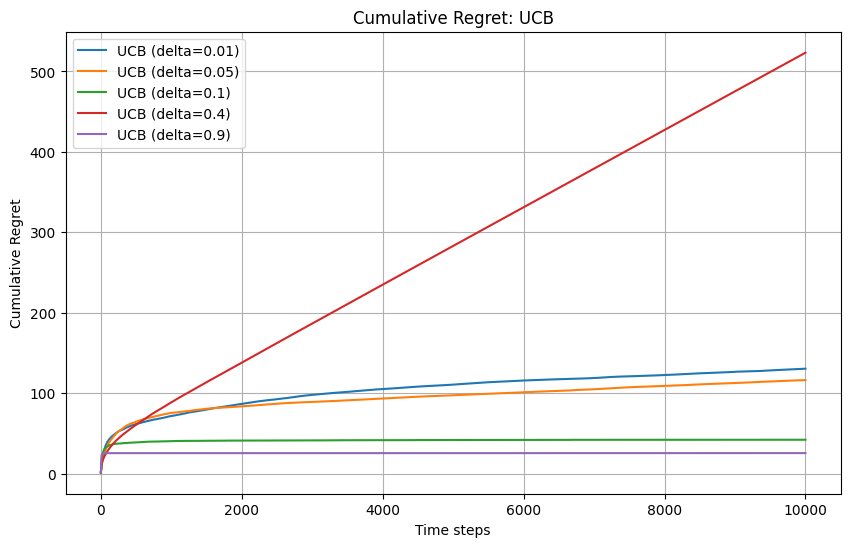

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot UCB for different delta values
for delta in delta_values:
    mean_regret = np.mean(delta_results[delta]['regret'], axis=0)
    plt.plot(mean_regret, label=f"UCB (delta={delta})")

plt.xlabel("Time steps")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret: UCB")
plt.legend()
plt.grid()
plt.show()


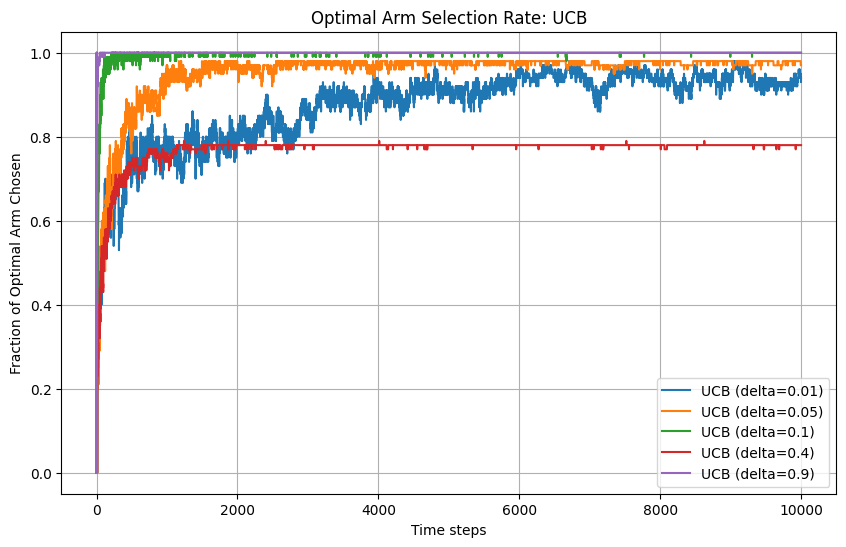

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot UCB for different delta values
for delta in delta_values:
    mean_optimal = np.mean(delta_results[delta]['optimal'], axis=0)
    plt.plot(mean_optimal, label=f"UCB (delta={delta})")

plt.xlabel("Time steps")
plt.ylabel("Fraction of Optimal Arm Chosen")
plt.title("Optimal Arm Selection Rate: UCB")
plt.legend()
plt.grid()
plt.show()


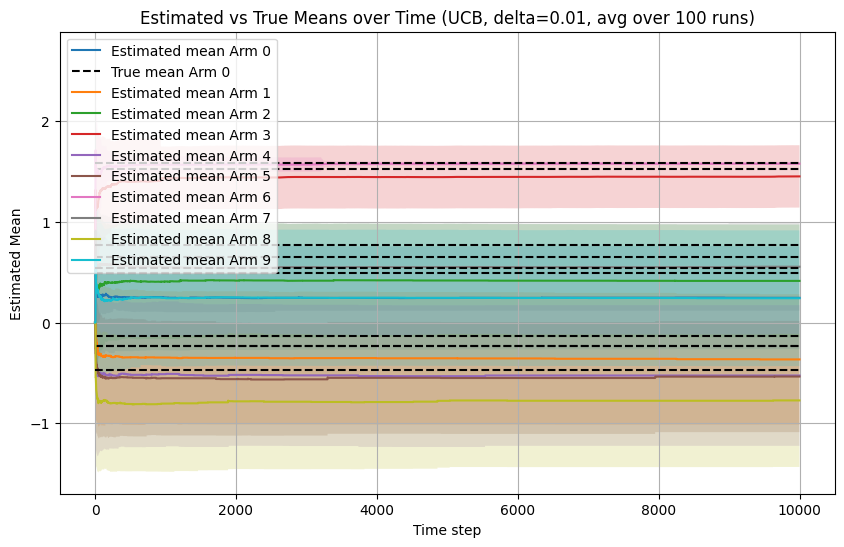

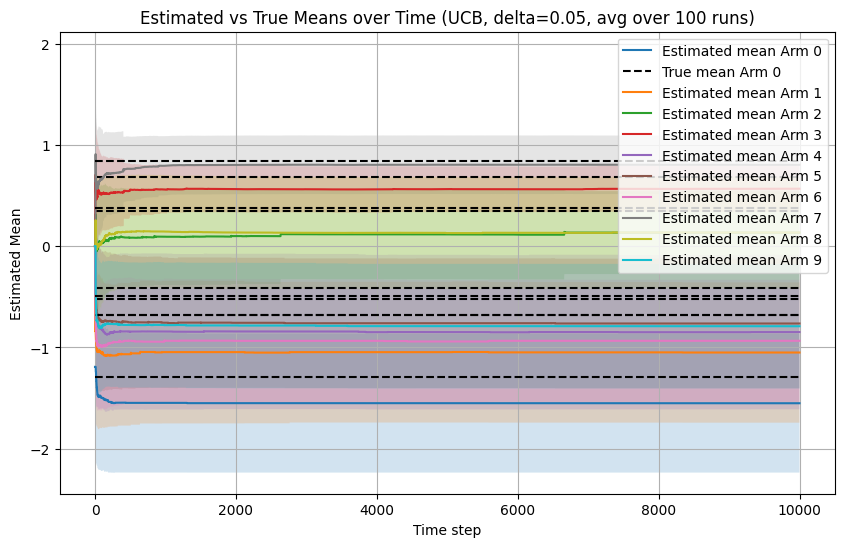

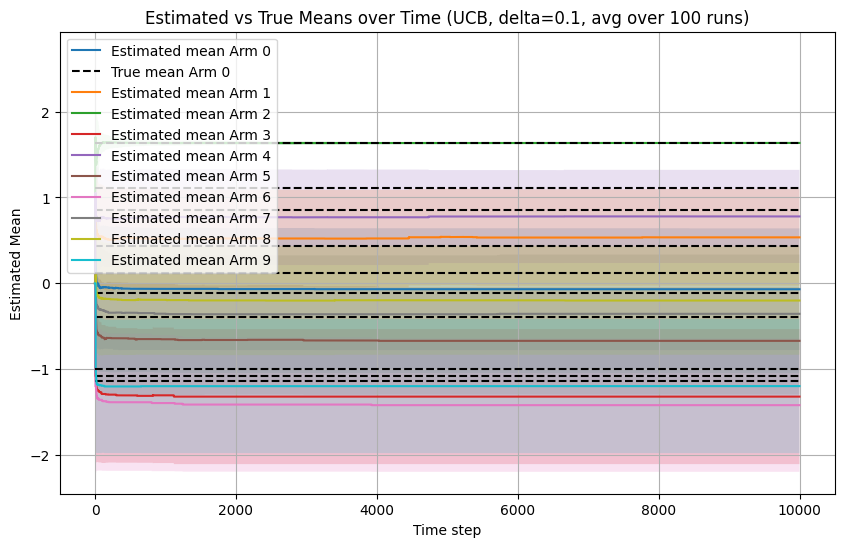

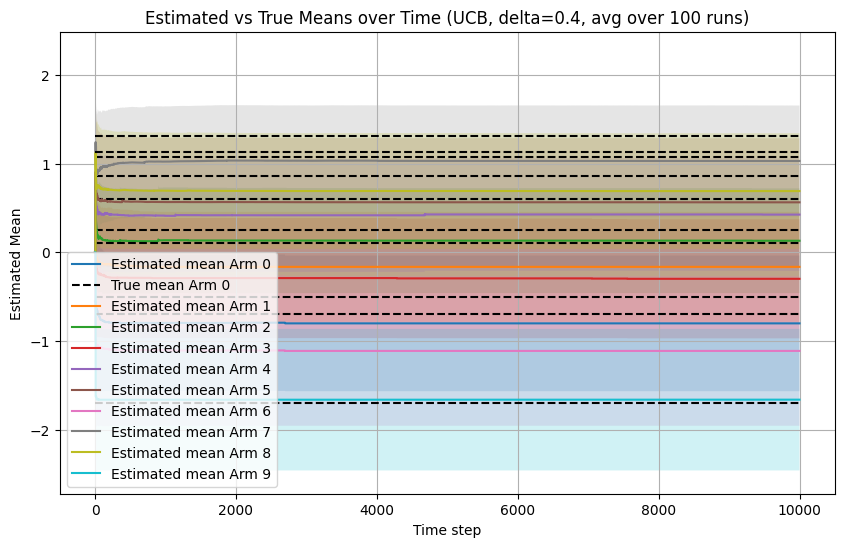

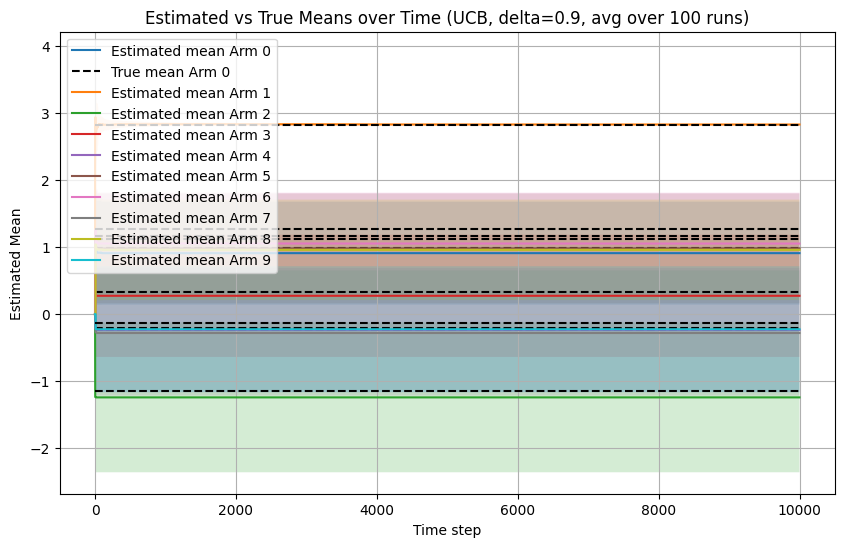

In [6]:
arms_to_plot = list(range(K))  # select arms to visualize
time_steps = np.arange(horizon)

for delta in estimates_over_time:
    est = estimates_over_time[delta]  # shape: [num_runs, time, K]

    plt.figure(figsize=(10, 6))
    for arm in arms_to_plot:
        mean_est = est[:, :, arm].mean(axis=0)  # shape: [time]
        std_est = est[:, :, arm].std(axis=0)    # shape: [time]

        # Plot estimated mean with confidence band
        plt.plot(time_steps, mean_est, label=f"Estimated mean Arm {arm}")
        plt.fill_between(time_steps, mean_est - std_est, mean_est + std_est, alpha=0.2)

        # Plot true mean as horizontal line
        true_mean = actual_means[delta][arm]
        plt.hlines(true_mean, 0, horizon, colors='k', linestyles='--',
                   label=f"True mean Arm {arm}" if arm == 0 else None)

    plt.title(f"Estimated vs True Means over Time (UCB, delta={delta}, avg over {num_simulations} runs)")
    plt.xlabel("Time step")
    plt.ylabel("Estimated Mean")
    plt.legend()
    plt.grid(True)
    plt.show()


Now let's get to UCB adapted to sigma-subgaussian bandit

In [2]:


sigma_values = [1]

sigma_results = {sigma: {'regret': [], 'optimal': []} for sigma in sigma_values}
estimates_over_time = {sigma: [] for sigma in sigma_values}
actual_means = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    print(f"Running simulations for SubGaussian UCB (sigma = {sigma})")
    bandit = Bandit(K=K, dist_type='gaussian')
    actual_means[sigma].append(bandit.means)

    for _ in tqdm(range(num_simulations)):
        agent = SubGaussianUCBAgent(K=K, sigma=sigma)
        _, regret, optimal_choices, estimates = simulate(bandit, agent, horizon)

        sigma_results[sigma]['regret'].append(regret)
        sigma_results[sigma]['optimal'].append(optimal_choices)
        estimates_over_time[sigma].append(estimates)

    estimates_over_time[sigma] = np.array(estimates_over_time[sigma])
    sigma_results[sigma]['optimal'] = np.array(sigma_results[sigma]['optimal'])
    actual_means[sigma] = np.array(actual_means[sigma][0])


Running simulations for SubGaussian UCB (sigma = 1)


100%|██████████| 100/100 [00:18<00:00,  5.53it/s]


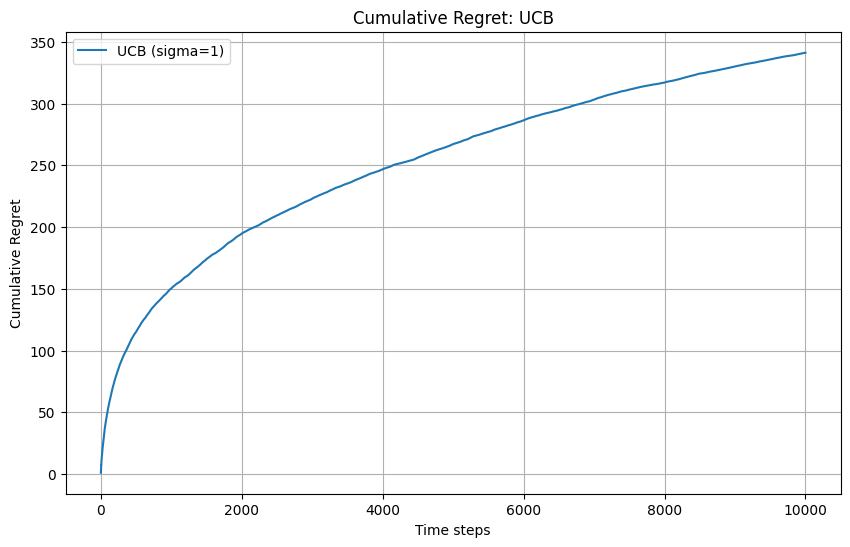

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot UCB for different delta values
for sigma in sigma_values:
    mean_regret = np.mean(sigma_results[sigma]['regret'], axis=0)
    plt.plot(mean_regret, label=f"UCB (sigma={sigma})")

plt.xlabel("Time steps")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret: UCB")
plt.legend()
plt.grid()
plt.show()


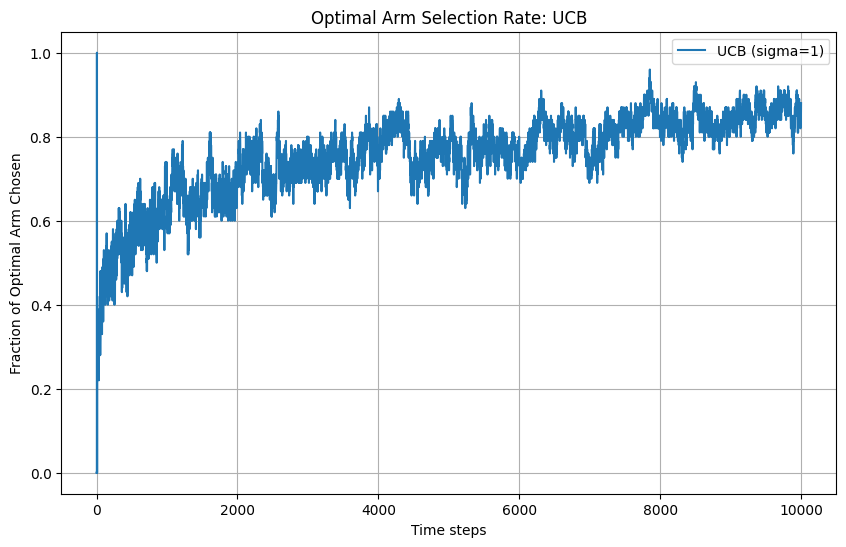

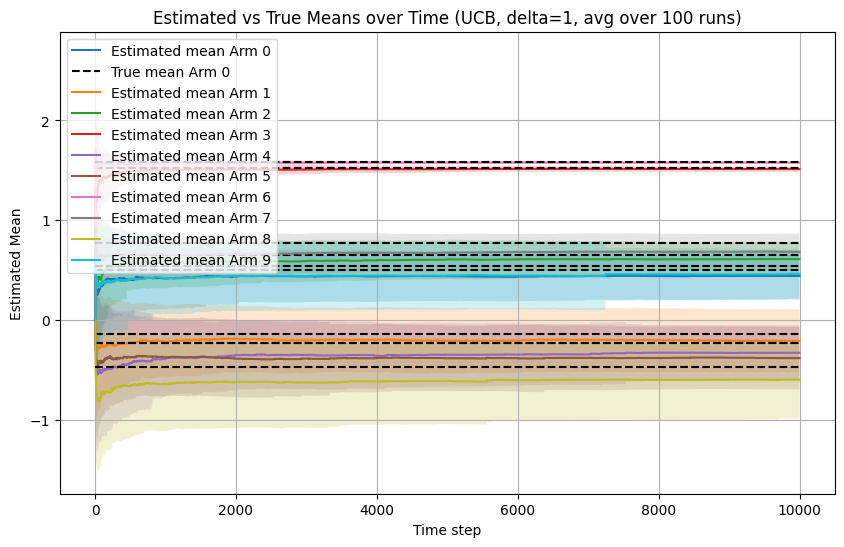

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Plot UCB for different delta values
for sigma in sigma_values:
    mean_optimal = np.mean(sigma_results[sigma]['optimal'], axis=0)
    plt.plot(mean_optimal, label=f"UCB (sigma={sigma})")

plt.xlabel("Time steps")
plt.ylabel("Fraction of Optimal Arm Chosen")
plt.title("Optimal Arm Selection Rate: UCB")
plt.legend()
plt.grid()
plt.show()


arms_to_plot = list(range(K))  # select arms to visualize
time_steps = np.arange(horizon)

for sigma in estimates_over_time:
    est = estimates_over_time[sigma]  # shape: [num_runs, time, K]

    plt.figure(figsize=(10, 6))
    for arm in arms_to_plot:
        mean_est = est[:, :, arm].mean(axis=0)  # shape: [time]
        std_est = est[:, :, arm].std(axis=0)    # shape: [time]

        # Plot estimated mean with confidence band
        plt.plot(time_steps, mean_est, label=f"Estimated mean Arm {arm}")
        plt.fill_between(time_steps, mean_est - std_est, mean_est + std_est, alpha=0.2)

        # Plot true mean as horizontal line
        true_mean = actual_means[sigma][arm]
        plt.hlines(true_mean, 0, horizon, colors='k', linestyles='--',
                   label=f"True mean Arm {arm}" if arm == 0 else None)

    plt.title(f"Estimated vs True Means over Time (UCB, delta={sigma}, avg over {num_simulations} runs)")
    plt.xlabel("Time step")
    plt.ylabel("Estimated Mean")
    plt.legend()
    plt.grid(True)
    plt.show()



And finally let's do UCB1

In [10]:
ucb1_results = {'regret': [], 'optimal': []}
estimates_over_time = []
actual_means = []

print("Running simulations for UCB1 Agent")
bandit = Bandit(K=K, dist_type='gaussian')
actual_means.append(bandit.means)

for _ in tqdm(range(num_simulations)):
    agent = UCB1Agent(K=K)
    _, regret, optimal_choices, estimates = simulate(bandit, agent, horizon)

    ucb1_results['regret'].append(regret)
    ucb1_results['optimal'].append(optimal_choices)
    estimates_over_time.append(estimates)

estimates_over_time = np.array(estimates_over_time)
ucb1_results['optimal'] = np.array(ucb1_results['optimal'])
actual_means = np.array(actual_means[0])

Running simulations for UCB1 Agent


100%|██████████| 100/100 [00:04<00:00, 22.76it/s]


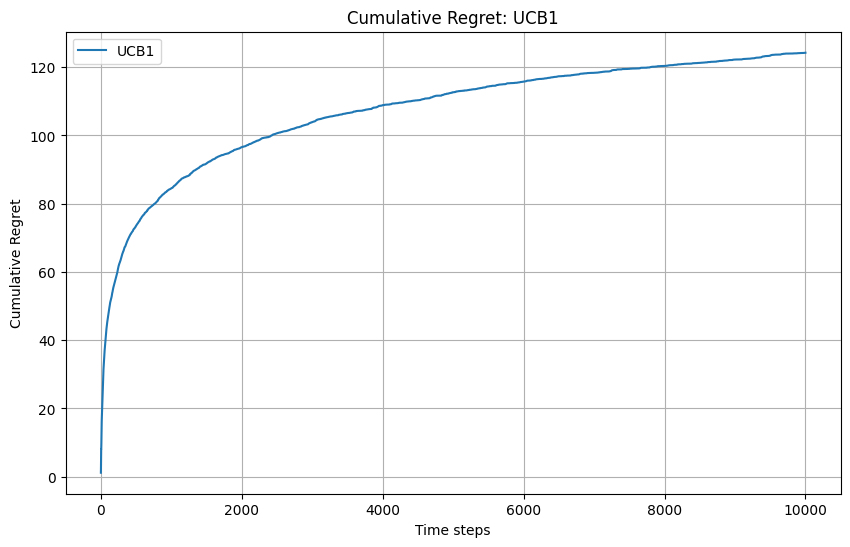

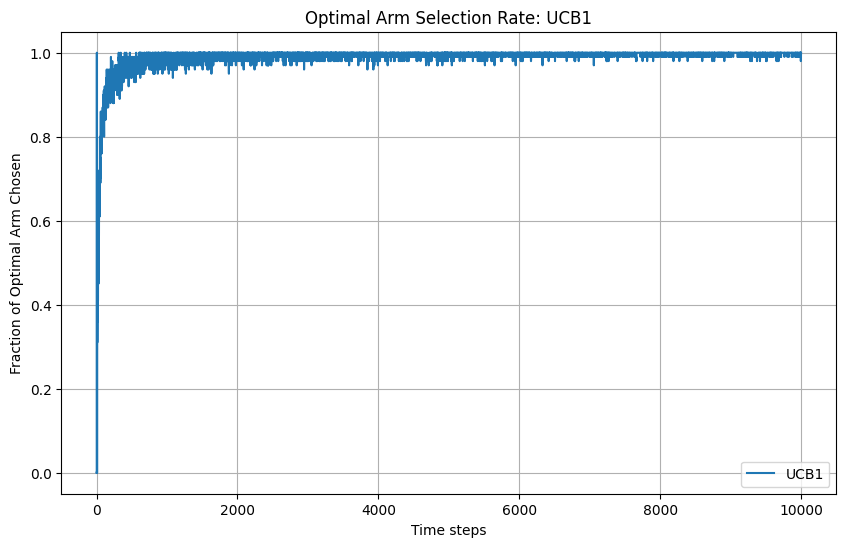

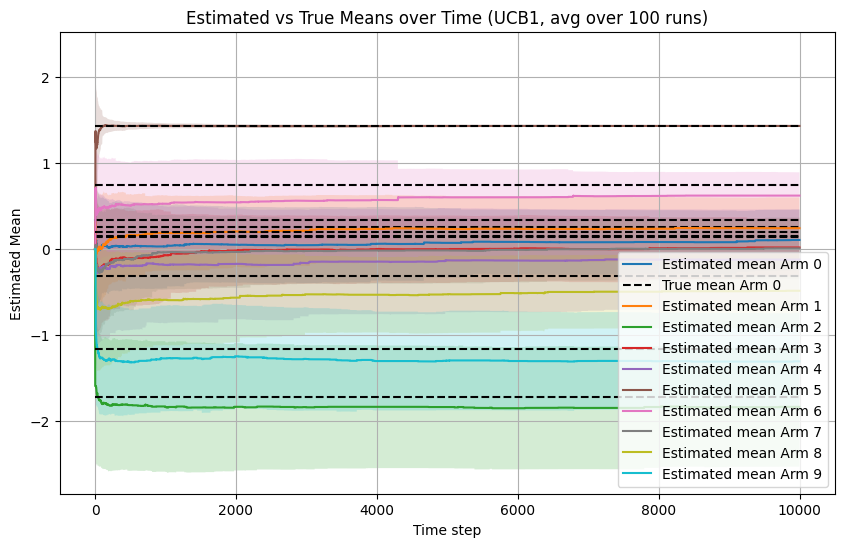

In [11]:
# Plotting results for UCB1 Agent
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
mean_regret = np.mean(ucb1_results['regret'], axis=0)
plt.plot(mean_regret, label="UCB1")
plt.xlabel("Time steps")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret: UCB1")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
mean_optimal = np.mean(ucb1_results['optimal'], axis=0)
plt.plot(mean_optimal, label="UCB1")
plt.xlabel("Time steps")
plt.ylabel("Fraction of Optimal Arm Chosen")
plt.title("Optimal Arm Selection Rate: UCB1")
plt.legend()
plt.grid()
plt.show()

arms_to_plot = list(range(K))  # select arms to visualize
time_steps = np.arange(horizon)

est = estimates_over_time  # shape: [num_runs, time, K]

plt.figure(figsize=(10, 6))
for arm in arms_to_plot:
    mean_est = est[:, :, arm].mean(axis=0)  # shape: [time]
    std_est = est[:, :, arm].std(axis=0)    # shape: [time]

    # Plot estimated mean with confidence band
    plt.plot(time_steps, mean_est, label=f"Estimated mean Arm {arm}")
    plt.fill_between(time_steps, mean_est - std_est, mean_est + std_est, alpha=0.2)

    # Plot true mean as horizontal line
    true_mean = actual_means[arm]
    plt.hlines(true_mean, 0, horizon, colors='k', linestyles='--',
               label=f"True mean Arm {arm}" if arm == 0 else None)

plt.title(f"Estimated vs True Means over Time (UCB1, avg over {num_simulations} runs)")
plt.xlabel("Time step")
plt.ylabel("Estimated Mean")
plt.legend()
plt.grid(True)
plt.show()

### 3. Boltzmann exploration: 
Implement the simple Boltzmann exploration, the version with
the Gumbel trick, and a version allowing arbitrary distributions (at least Cauchy, Beta,
Betaprime, Chi, see e.g. scipy.stats) instead of Gumbel. Additionally, implement a version
where